In [1]:
from qiskit import * ### Importing the library to our notebook
from qiskit_aer import AerSimulator
from qiskit_aer import AerProvider
from qiskit.visualization import plot_histogram
from qiskit import QuantumRegister
from qiskit import ClassicalRegister


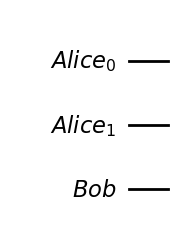

In [2]:
qalice = QuantumRegister(2, "Alice") # Alice has a qbit she wants to transfer, and a qbit entangled with Bob's qbit. 
qbob = QuantumRegister(1, "Bob") # Bob has the corresponsing entangled qbit
qcirc = QuantumCircuit(qalice, qbob) # Initialise circuit
qcirc.draw('mpl')

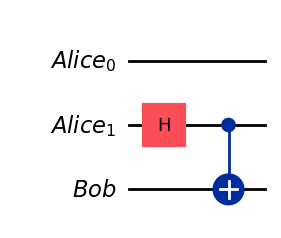

In [3]:
qcirc.h(qalice[1]) # Hadamart gate on Alice's second qbit 
qcirc.cx(qalice[1], qbob[0]) #CNOT from alice to Bob
qcirc.draw('mpl')

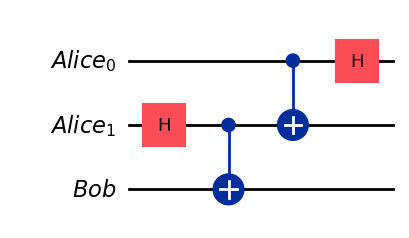

In [4]:
qcirc.cx(qalice[0], qalice[1])
qcirc.h(qalice[0])
qcirc.draw('mpl')

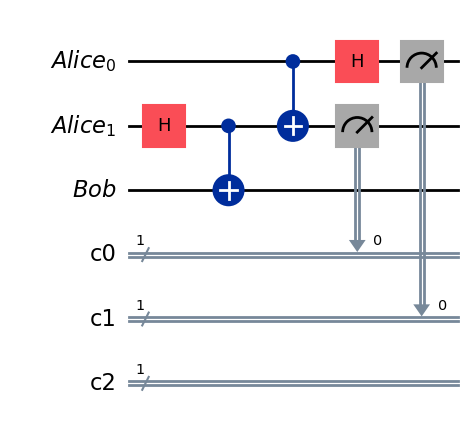

In [5]:
ballice = ClassicalRegister(1) #initialise classical register for measurement of qbit
qcirc.add_register(ballice)

alice_qubit2 = ClassicalRegister(1) #initialise classical register for measurement of qbit
qcirc.add_register(alice_qubit2)

bob_final = ClassicalRegister(1) #initialise classical register for measurement of qbit
qcirc.add_register(bob_final)

qcirc.measure(qalice[1],ballice) #measurement 
qcirc.measure(qalice[0],alice_qubit2) #measurement

qcirc.draw(output='mpl')

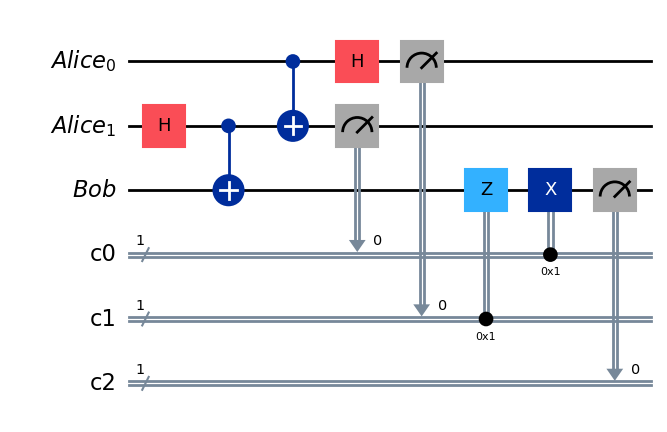

In [6]:
qcirc.z(qbob).c_if(alice_qubit2, 1)  # If qalice was |1>, apply Z
qcirc.x(qbob).c_if(ballice, 1)   # If qalice was |1>, apply X

qcirc.measure(qbob, bob_final)

qcirc.draw(output='mpl')

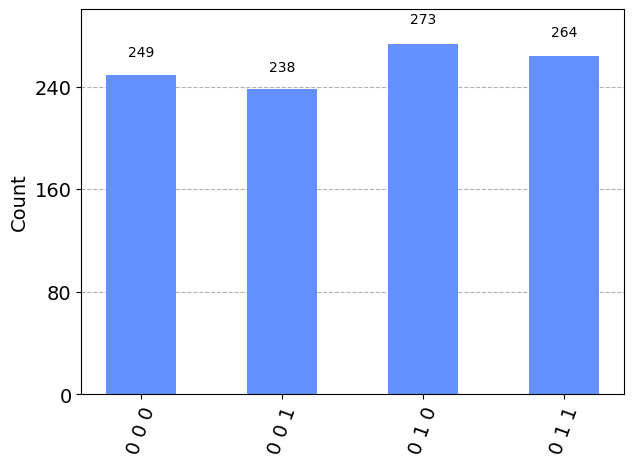

In [7]:
prov = AerProvider()
simulator = prov.get_backend('qasm_simulator')
result = simulator.run(qcirc).result()
plot_histogram(result.get_counts(qcirc))